In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.feature import graycomatrix, graycoprops
from skimage import io
from skimage import img_as_ubyte
import cv2 as cv

In [78]:
PATCH_SIZE = 35

# Adding the image and convert it into grey color image:-
img = cv.imread('mt_everst.jpg',2)
re_img = cv.resize(img,(1700,1700))
cv.imshow('Mountain Resize',re_img)
cv.waitKey(0)
cv.destroyAllWindows()
cv.waitKey(1)

-1

In [61]:
GLCM = graycomatrix(img,[1],[0,np.pi/4,np.pi/2,3*np.pi/4])
a = graycoprops(GLCM,'energy')[0,0]
a

0.03595763856226541

In [62]:
from skimage import exposure

In [63]:
cell_location = [(100,100),(850,850),(670,850),(1600,850)]
cell_patches = []
for loc in cell_location:
    cell_patches.append(image[loc[0]:loc[0] + PATCH_SIZE,loc[1]:loc[1] + PATCH_SIZE])
    patch_rescaled = exposure.rescale_intensity(patch, in_range='image', out_range=(0, 1))
    cell_patches.append(patch_rescaled)

In [ ]:
# scratch_locations = [

### Compute GLCM

In [68]:
dis_simm = []
corr = []
homogen = []
energy = []
contrast = []

for patch in (cell_patches):
    patch_uint8 = img_as_ubyte(patch)
    glcm = graycomatrix(patch_uint8, distances=[5], angles=[0], levels=256,symmetric=True, normed=True)
    dis_simm.append(graycoprops(glcm, 'dissimilarity')[0, 0]) #[0,0] to convert array to value
    corr.append(graycoprops(glcm, 'correlation')[0, 0])
    homogen.append(graycoprops(glcm, 'homogeneity')[0, 0])
    energy.append(graycoprops(glcm, 'energy')[0, 0])
    contrast.append(graycoprops(glcm, 'contrast')[0, 0])

(-0.5, 4999.5, 3337.5, -0.5)

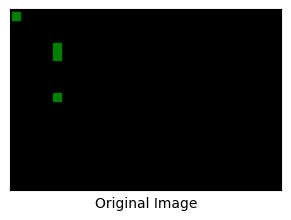

In [77]:
fig = plt.figure(figsize=(8, 8))

# display original image with locations of patches
ax = fig.add_subplot(3, 2, 1)
ax.imshow(image, cmap=plt.cm.gray,
          vmin=0, vmax=255)
for (y, x) in cell_location:
    ax.plot(x + PATCH_SIZE / 2, y + PATCH_SIZE / 2, 'gs')
ax.set_xlabel('Original Image')
ax.set_xticks([])
ax.set_yticks([])
ax.axis('image')

In [76]:
ax = fig.add_subplot(3, 2, 2)
ax.plot(dis_simm[:len(cell_patches)], corr[:len(cell_patches)], 'go',
        label='Cells')
ax.plot(dis_simm[len(cell_patches):], corr[len(cell_patches):], 'bo',
        label='Scratch')
ax.set_xlabel('GLCM Dissimilarity')
ax.set_ylabel('GLCM Correlation')
ax.legend()

# display the image patches
for i, patch in enumerate(cell_patches):
    ax = fig.add_subplot(3, len(cell_patches), len(cell_patches)*1 + i + 1)
    ax.imshow(patch, cmap=plt.cm.gray,
              vmin=0, vmax=255)
    ax.set_xlabel('Cells %d' % (i + 1))


# display the patches and plot
fig.suptitle('Grey level co-occurrence matrix features', fontsize=14, y=1.05)
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>